In [1]:
#GeoBrownian
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
price = pd.read_csv('VIC.csv')
price['Close'] = price['Close'].astype('int64')

In [2]:
# Tính lợi suất log
log_returns = np.log(price['Close'] / price['Close'].shift(1))

# Tính drift (trung bình lợi suất)
mu = log_returns.mean()

# Tính volatility (độ lệch chuẩn của lợi suất)
sigma = log_returns.std()

# Annualize (chuyển đổi sang đơn vị năm)
mu_annualized = mu * (252 * 6.5 * 60)  # 252 ngày, mỗi ngày có 6.5 giờ, mỗi giờ có 60 phút
sigma_annualized = sigma * np.sqrt(252 * 6.5 * 60)
# Các thông số
S0 = price['Close'].iloc[-1]  # Giá cuối cùng trong dữ liệu hiện tại
T = 252  # Số ngày giao dịch cần mô phỏng
n_intervals_per_day = int(6.5 * 60)  # Số khoảng 1 phút trong một ngày giao dịch
n_steps = T * n_intervals_per_day  # Tổng số bước thời gian
dt = 1 / n_steps  # Bước thời gian trong đơn vị năm
n_scenarios = 100  # Số kịch bản mô phỏng


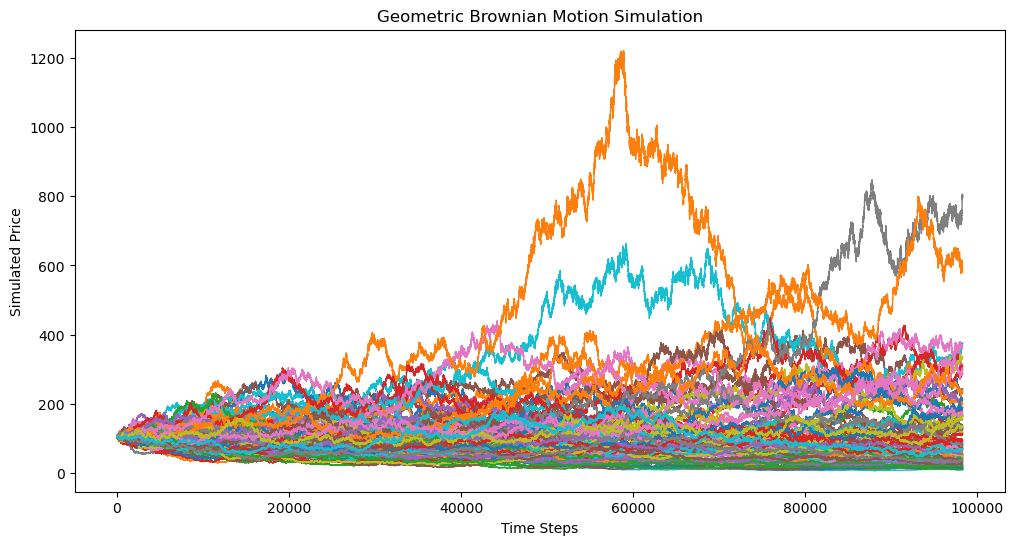

In [3]:
# Đặt random seed để tái lập kết quả
np.random.seed(42)

# Tính drift và shock
drift = (mu_annualized - 0.5 * sigma_annualized**2) * dt
shock = sigma_annualized * np.sqrt(dt)

# Tạo ma trận kịch bản ngẫu nhiên cho các bước thời gian
Z = np.random.normal(0, 1, (n_steps, n_scenarios))
random_walk = drift + shock * Z

# Tính giá mô phỏng cho từng kịch bản
price_paths = np.zeros((n_steps + 1, n_scenarios))
price_paths[0] = S0  # Giá ban đầu

for t in range(1, n_steps + 1):
    price_paths[t] = price_paths[t - 1] * np.exp(random_walk[t - 1])

# Vẽ đồ thị kết quả mô phỏng
plt.figure(figsize=(12, 6))
for i in range(min(n_scenarios, 1000)):  # Hiển thị tối đa 1000 kịch bản
    plt.plot(price_paths[:, i], lw=1)
plt.title('Geometric Brownian Motion Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Simulated Price')
plt.show()


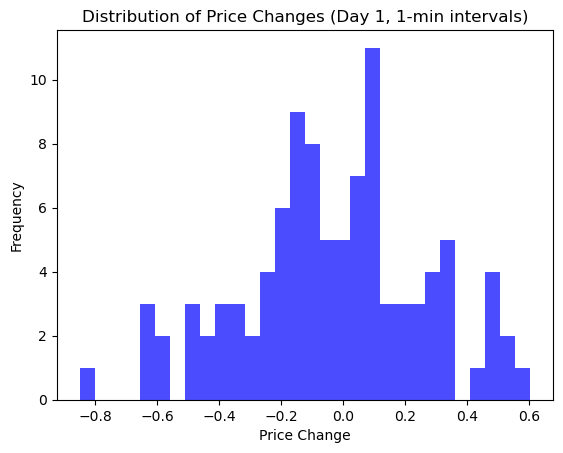

In [4]:
# Tính biến động giá (Delta P)
delta_price = np.diff(price_paths, axis=0)

# Tính tỷ lệ biến động giá (Delta P%)
delta_pct = (delta_price / price_paths[:-1, :]) * 100
mean_delta_price = delta_price.mean(axis=1)  # Trung bình biến động giá theo từng bước
std_delta_price = delta_price.std(axis=1)    # Độ lệch chuẩn biến động giá theo từng bước
# Phân phối biến động giá tại bước thời gian cụ thể (ví dụ, ngày đầu tiên)
plt.hist(delta_price[0], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Price Changes (Day 1, 1-min intervals)')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

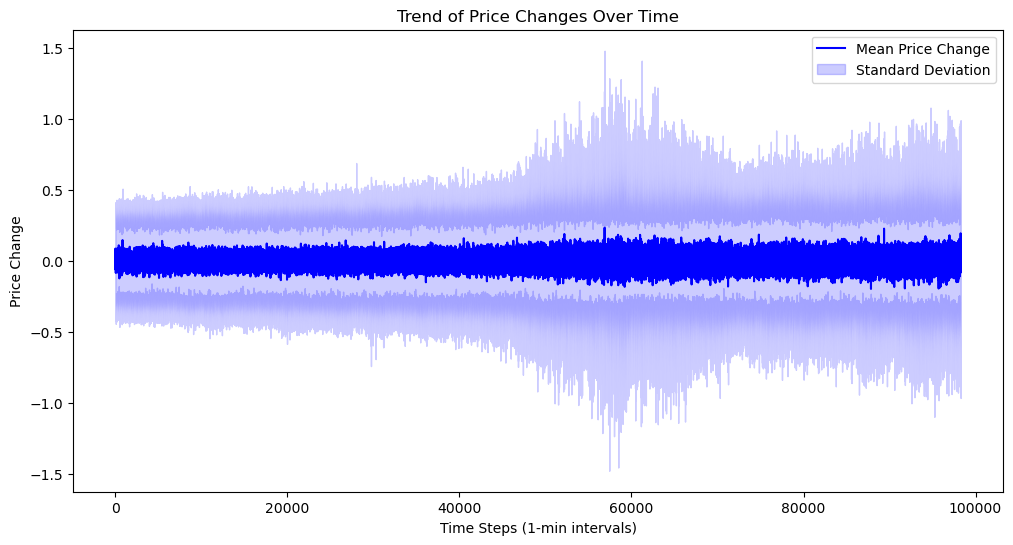

In [7]:
# Biểu đồ xu hướng trung bình và độ lệch chuẩn
plt.figure(figsize=(12, 6))
plt.plot(mean_delta_price, label='Mean Price Change', color='blue')
plt.fill_between(range(len(mean_delta_price)), 
                 mean_delta_price - std_delta_price, 
                 mean_delta_price + std_delta_price, 
                 color='blue', alpha=0.2, label='Standard Deviation')
plt.title('Trend of Price Changes Over Time')
plt.xlabel('Time Steps (1-min intervals)')
plt.ylabel('Price Change')
plt.legend()
plt.show()